In [ ]:
!git clone https://github.com/joaquindariosilva/AirTransportNetwork

Cloning into 'AirTransportNetwork'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
%cd AirTransportNetwork/

/content/AirTransportNetwork


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
proxyemail = '64678757+jdspanda@users.noreply.github.com'

In [ ]:
# Install kaggle library
!pip install kaggle
!pip install --upgrade kaggle

# Set up Kaggle authentication
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Get user input for Kaggle dataset URL
dataset_url = input("Enter the Kaggle dataset URL: ")

# Extract the dataset name (value after "datasets/")
try:
    dataset_name = dataset_url.split("datasets/")[1]
except IndexError:
    raise ValueError("Invalid Kaggle dataset URL. Please ensure it includes 'datasets/'.")

# Download the dataset
!kaggle datasets download {dataset_name}

# Unzip the dataset if it's a zip file
import os
import zipfile

zip_file = f"{dataset_name.split('/')[-1]}.zip"  # Assumes zip file name matches dataset
if os.path.exists(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(".")
    print(f"Dataset extracted: {zip_file}")

    # Delete the zip file after extraction
    os.remove(zip_file)
    print(f"Deleted zip file: {zip_file}")
else:
    print("The downloaded dataset is not a zip file.")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17
Enter the Kaggle dataset URL: https://www.kaggle.com/datasets/thedevastator/global-air-transportation-network-mapping-the-wo
Dataset URL: https://www.kaggle.com/datasets/thedevastator/global-air-transportation-network-mapping-the-wo
License(s): other
Dataset extracted: global-air-transportation-network-mapping-the-wo.zip
Deleted zip file: global-air-transportation-network-mapping-the-wo.zip


In [ ]:
!pip install pandas
!pip install ipywidgets
!pip install IPython
!pip install numpy

# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For handling missing values
from ipywidgets import interact, Dropdown, Button, Output  # For interactivity in Jupyter/Colab
from IPython.display import display  # To display dataframes neatly in Jupyter/Colab

from ipywidgets import Dropdown, HBox, VBox, Output
from IPython.display import display
import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


In [ ]:
routes = pd.read_csv('routes.csv')
nodes = pd.read_csv('airports.csv')

In [ ]:
# Universal function for dataset exploration
def inspect(df):
    """
    Displays the column names, types, null counts, and unique values of a DataFrame.
    Args:
        df (pd.DataFrame): The input DataFrame.
    Returns:
        pd.DataFrame: Summary of columns with metadata.
    """
    column_summary = pd.DataFrame({
        "Columns": df.columns,                # Column names
        "Types": df.dtypes.astype(str),       # Data types as strings
        "Null Count": df.isnull().sum(),      # Number of null (missing) values
        "Unique Values": df.nunique()         # Number of unique values
    }).reset_index(drop=True)
    return column_summary

In [ ]:
def dtypeschange(df):
    """
    Renders a DataFrame as an HTML table with embedded dropdowns for type selection and column deletion.
    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    from google.colab import output
    from IPython.display import HTML, display
    import pandas as pd

    # JavaScript code for handling dropdown changes
    js_code = """
    <script>
        function handleTypeChange(column) {
            let selectedType = document.getElementById(column + '_type').value;
            google.colab.kernel.invokeFunction(
                'update_dtype', // Callback function name
                [column, selectedType], // Arguments to pass
                {}
            );
        }
    </script>
    """

    # Define dropdown options (including 'drop' to delete the column)
    type_options = ['int64', 'float64', 'object', 'datetime64[ns]', 'drop']

    # Define the callback function for transformations
    def update_dtype(column, dtype):
        try:
            if dtype == 'drop':  # Drop the column if "drop" is selected
                df.drop(columns=[column], inplace=True)
                print(f"Column '{column}' has been dropped.")
            elif dtype == 'datetime64[ns]':  # Convert to datetime
                df[column] = pd.to_datetime(df[column], errors='coerce')
                print(f"Column '{column}' successfully converted to {dtype}")
            else:  # Convert to the specified type
                df[column] = df[column].astype(dtype)
                print(f"Column '{column}' successfully converted to {dtype}")
        except Exception as e:
            print(f"Error processing column '{column}': {e}")

    # Register the callback function in Google Colab
    output.register_callback('update_dtype', update_dtype)

    # Add a note about the index column
    print(f"Note: The index column ('{df.index.name if df.index.name else 'Unnamed Index'}') is excluded from type changes.")

    # Build and render the HTML table
    column_summary = pd.DataFrame({
        "Columns": df.columns,
        "Current Type": df.dtypes.astype(str),
        "Desired Type": [str(dtype) for dtype in df.dtypes]
    })
    table_html = '<table border="1">'
    table_html += '<tr><th>Column Name</th><th>Current Type</th><th>Desired Type</th></tr>'
    for _, row in column_summary.iterrows():
        col = row["Columns"]
        current_type = row["Current Type"]
        if col == df.index.name:  # Skip the index column
            continue
        desired_type_html = f'<select id="{col}_type" onchange="handleTypeChange(\'{col}\')">'
        for option in type_options:
            selected = 'selected' if option == current_type else ''
            if option == 'drop':
                desired_type_html += f'<option value="{option}" style="color:red;" {selected}>{option}</option>'
            else:
                desired_type_html += f'<option value="{option}" {selected}>{option}</option>'
        desired_type_html += '</select>'
        table_html += f'<tr><td>{col}</td><td>{current_type}</td><td>{desired_type_html}</td></tr>'
    table_html += '</table>'
    display(HTML(table_html + js_code))


In [ ]:
# Merge to get the source airport details
network = pd.merge(routes, nodes, how='left', left_on='Source airport', right_on='IATA')

# Merge again to get the destination airport details
network = pd.merge(network, nodes, how='left', left_on='Destination airport', right_on='IATA', suffixes=('_source', '_destination'))

inspect(network)

,Columns,Types,Null Count,Unique Values
0,index_x,int64,0,67663
1,Airline,object,0,568
2,Airline ID,object,0,548
3,Source airport,object,0,3409
4,Source airport ID,object,0,3321
5,Destination airport,object,0,3418
6,Destination airport ID,object,0,3327
7,Codeshare,object,53066,1
8,Stops,int64,0,2
9,Equipment,object,18,3945


In [ ]:
print(network.columns)

Index(['index_x', 'Airline', 'Airline ID', 'Source airport',
       'Source airport ID', 'Destination airport', 'Destination airport ID',
       'Codeshare', 'Stops', 'Equipment', 'index_y', 'Airport ID_source',
       'Name_source', 'City_source', 'Country_source', 'IATA_source',
       'ICAO_source', 'Latitude_source', 'Longitude_source', 'Altitude_source',
       'Timezone_source', 'DST_source', 'Tz database time zone_source',
       'Type_source', 'Source_source', 'index', 'Airport ID_destination',
       'Name_destination', 'City_destination', 'Country_destination',
       'IATA_destination', 'ICAO_destination', 'Latitude_destination',
       'Longitude_destination', 'Altitude_destination', 'Timezone_destination',
       'DST_destination', 'Tz database time zone_destination',
       'Type_destination', 'Source_destination'],
      dtype='object')


In [ ]:
network = network.loc[:, ['Source airport',
       'Destination airport','Latitude_source', 'Longitude_source',   'Latitude_destination',
       'Longitude_destination']]

In [ ]:
inspect(network)

,Columns,Types,Null Count,Unique Values
0,Source airport,object,0,3409
1,Destination airport,object,0,3418
2,Latitude_source,float64,406,3248
3,Longitude_source,float64,406,3250
4,Latitude_destination,float64,416,3251
5,Longitude_destination,float64,416,3253


In [ ]:
mapa = network.dropna(subset=['Latitude_source'])
mapa = mapa.dropna(subset=['Latitude_destination'])
inspect(mapa)

,Columns,Types,Null Count,Unique Values
0,Source airport,object,0,3241
1,Destination airport,object,0,3240
2,Latitude_source,float64,0,3237
3,Longitude_source,float64,0,3239
4,Latitude_destination,float64,0,3236
5,Longitude_destination,float64,0,3238


In [ ]:
import gc
gc.collect()

93

In [ ]:
import networkx as nx
# Create a directed graph
G = nx.DiGraph()

# Add edges from Source to Destination
for index, row in mapa.iterrows():
    G.add_edge(row['Source airport'], row['Destination airport'])

In [ ]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 3257
Number of edges: 37042


In [ ]:
# Top 5 nodes by Degree Centrality
top_degree = centrality_df.sort_values(by="Degree Centrality", ascending=False).head(5)
print("Top 5 by Degree Centrality:")
print(top_degree)

# Top 5 nodes by Betweenness Centrality
top_betweenness = centrality_df.sort_values(by="Betweenness Centrality", ascending=False).head(5)
print("\nTop 5 by Betweenness Centrality:")
print(top_betweenness)

# Top 5 nodes by Closeness Centrality
top_closeness = centrality_df.sort_values(by="Closeness Centrality", ascending=False).head(5)
print("\nTop 5 by Closeness Centrality:")
print(top_closeness)

Top 5 by Degree Centrality:
    Node  Degree Centrality  Betweenness Centrality  Closeness Centrality
487  FRA           0.146499                0.052101              0.404842
434  CDG           0.144349                0.063392              0.402525
216  AMS           0.142199                0.043818              0.394792
758  IST           0.139742                0.042858              0.383315
191  ATL           0.132985                0.029903              0.367598

Top 5 by Betweenness Centrality:
    Node  Degree Centrality  Betweenness Centrality  Closeness Centrality
434  CDG           0.144349                0.063392              0.402525
331  LAX           0.090602                0.060327              0.388205
156  DXB           0.113022                0.059274              0.395581
684  ANC           0.020885                0.053837              0.295541
487  FRA           0.146499                0.052101              0.404842

Top 5 by Closeness Centrality:
    Node  Degree C

In [ ]:
# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Convert to DataFrame
eigenvector_df = pd.DataFrame({
    "Node": list(eigenvector_centrality.keys()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Sort and get the top 5 nodes
top_eigenvector = eigenvector_df.sort_values(by="Eigenvector Centrality", ascending=False).head(5)
print("Top 5 Nodes by Eigenvector Centrality:")
print(top_eigenvector)

Top 5 Nodes by Eigenvector Centrality:
    Node  Eigenvector Centrality
216  AMS                0.165947
487  FRA                0.165782
434  CDG                0.159255
182  MUC                0.149006
452  LHR                0.137073


In [ ]:
density = nx.density(G)
print(f"Network density: {density}")

Network density: 0.0034929492252181843


In [ ]:
components = list(nx.connected_components(G.to_undirected()))
print(f"Number of connected components: {len(components)}")

Number of connected components: 7


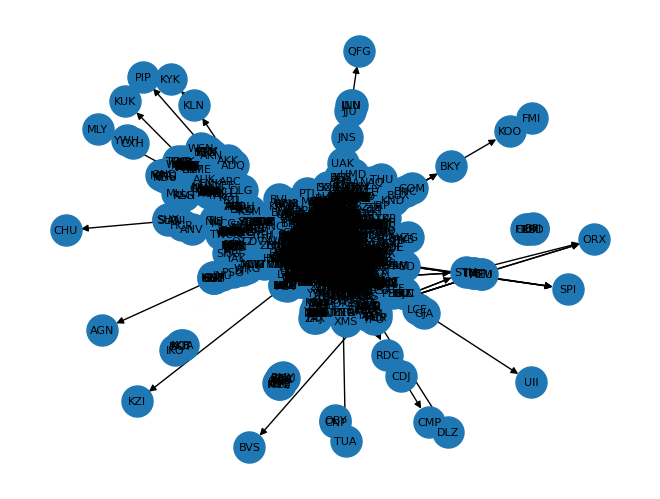

In [ ]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_size=500, font_size=8)
plt.show()

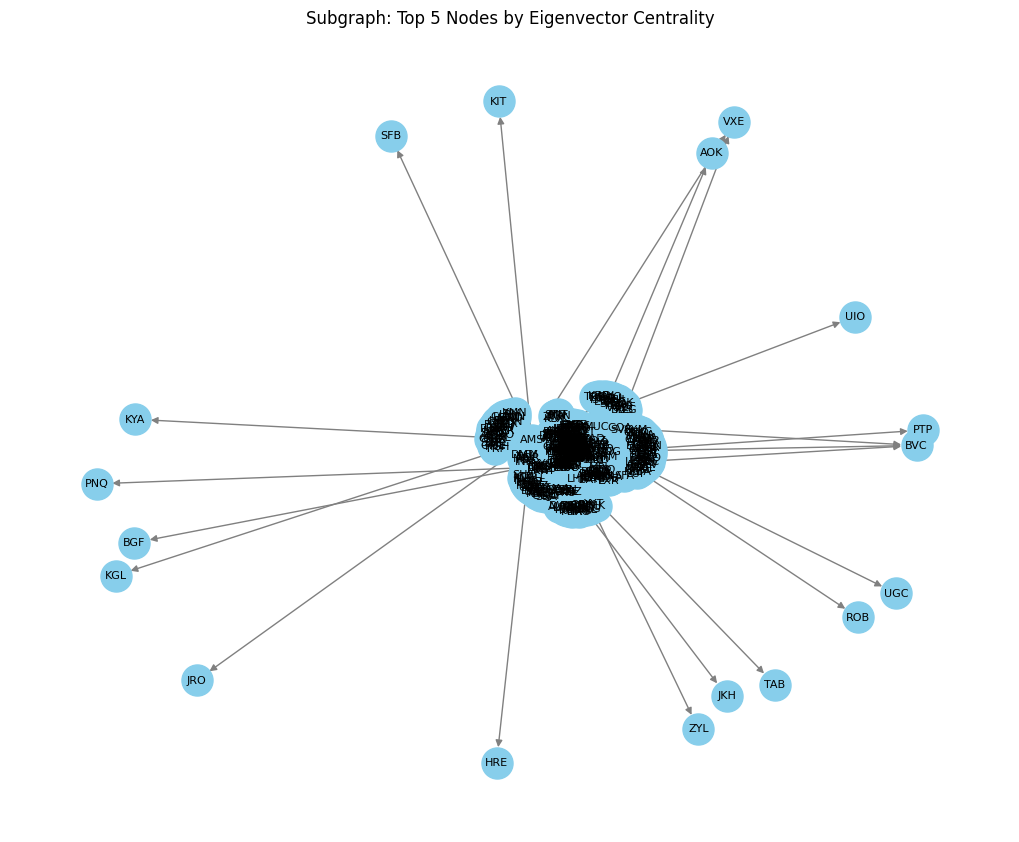

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Step 2: Extract Top 5 Nodes by Eigenvector Centrality
top_5_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

# Step 3: Create a Subgraph with Only the Top 5 Nodes and Their Connections
# Identify edges where either source or destination is in the top 5
edges_to_include = [(u, v) for u, v in G.edges() if u in top_5_nodes or v in top_5_nodes]

# Create a subgraph
subgraph = G.edge_subgraph(edges_to_include).copy()

# Step 4: Visualize the Subgraph
plt.figure(figsize=(10, 8))
nx.draw(subgraph, with_labels=True, node_size=500, font_size=8, node_color="skyblue", edge_color="gray")
plt.title("Subgraph: Top 5 Nodes by Eigenvector Centrality")
plt.show()

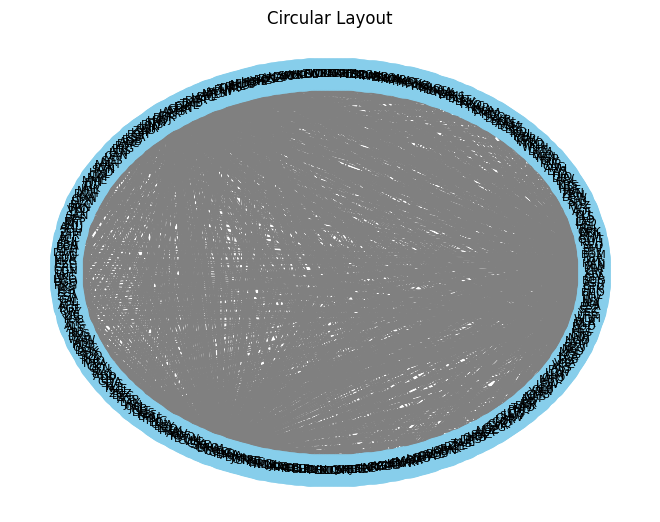

In [ ]:
pos = nx.circular_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=8, node_color="skyblue", edge_color="gray")
plt.title("Circular Layout")
plt.show()
